## 1. Download and load dataset

Read [this API](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) and use the function `fashion_mnist.load_data()` to download and load the data into the variables: `X_train, Y_train, X_test, Y_test`.

The shapes of `X_train, Y_train, X_test, Y_test` are `(60000, 28, 28) (60000,), (10000, 28, 28), (10000,)` respectively.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from keras import layers
import tensorflow
from keras.datasets import fashion_mnist

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist


In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 2. Converting pixel values to range [0, 1]

The pixel values in loaded images are integers in `[0, 255]`, while classifiers usually require real-valued pixels in `[0, 1]` to work well.

Below is the code to convert the train and test images' pixels in `X_train` and `X_test` to range `[0, 1]` by dividing all pixels by `255.0`.

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## 3. Inspect some train images and labels



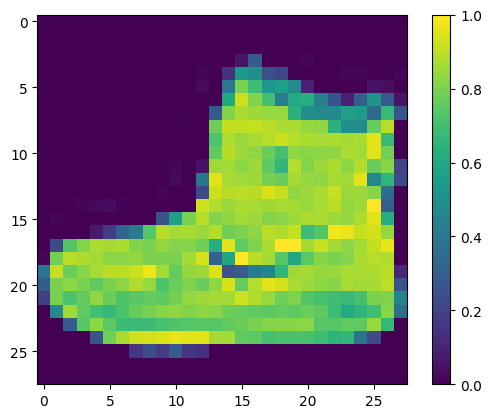

In [ ]:
import matplotlib.pyplot as plt
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
img_id = 0
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

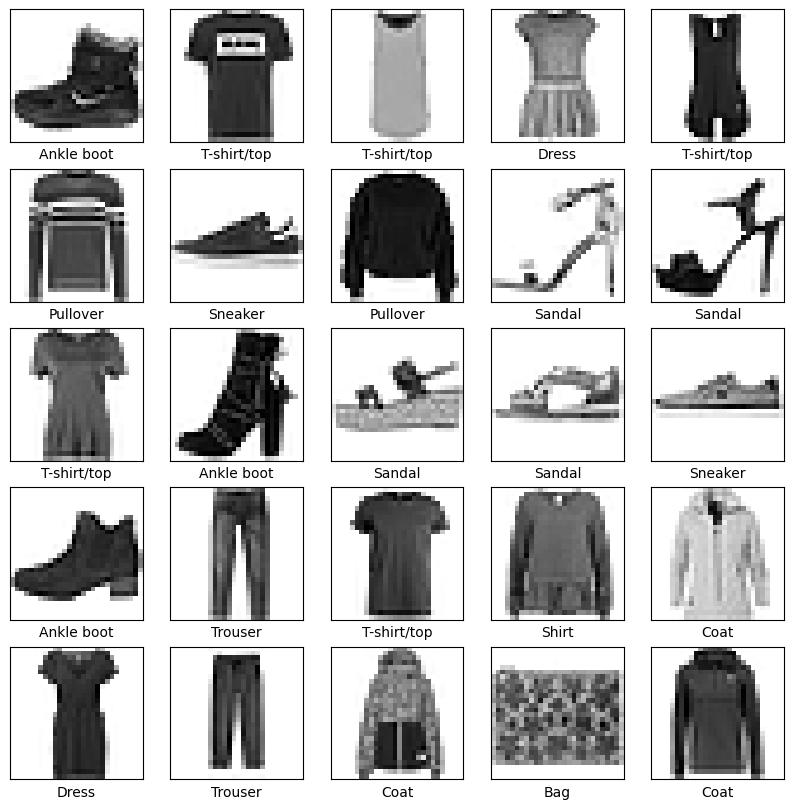

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[Y_train[i]])
plt.show()

## 4. Reshape input images

The new shapes for `X_train` and `X_test` should be `(60000, 28, 28, 1)` and `(10000, 28, 28, 1)`.

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


## 5. Convert label vectors into one-hot encodings

To train/test a model with Keras, the labels have to be in one-hot encoding format.

In [ ]:
 import keras
 Num_classes=10
 Y_train = keras.utils.to_categorical(Y_train, Num_classes)
 Y_test = keras.utils.to_categorical(Y_test, Num_classes)

\## 6. Define the CNN model



In [ ]:
from tensorflow.keras import layers, models
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.models import Sequential
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 50)                156850    
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 157520 (615.31 KB)
Trainable params: 157520 (615.31 KB)
Non-trainable params: 0 (0.00 Byte)
______________

## 7. Compile the model



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 8. Train the model



In [ ]:
batch_size = 128
epochs = 10
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 1.0566 - accuracy: 0.6588
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5994 - accuracy: 0.7911
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5388 - accuracy: 0.8101
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5014 - accuracy: 0.8223
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4783 - accuracy: 0.8326
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4617 - accuracy: 0.8387
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4479 - accuracy: 0.8418
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4347 - accuracy: 0.8483
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4255 - accuracy: 0.8509
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4152 - accuracy: 0.8548

## 9. Evaluate the trained model on test set



In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(accuracy*100)

85.07999777793884


## 10.Plot some test images and compare true labels with predicted labels


In [ ]:
pred = model.predict(X_test)
print(pred)
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)


313/313 [==============================] - 1s 2ms/step
[[2.29326597e-05 1.03844650e-06 2.12325976e-05 ... 1.43754736e-01
  4.77335509e-03 7.51405478e-01]
 [2.60694505e-04 1.63840614e-05 9.39112663e-01 ... 8.47377457e-09
  4.96643443e-05 2.84984175e-10]
 [1.26313907e-05 9.99981880e-01 2.92373528e-07 ... 9.50161478e-08
  1.13123221e-07 8.87455803e-11]
 ...
 [8.76997504e-03 9.92738205e-06 3.06230388e-04 ... 1.10904635e-04
  9.72845137e-01 1.66804875e-05]
 [7.14103080e-05 9.99091864e-01 6.73043132e-06 ... 1.68091665e-05
  1.94915938e-05 5.99780094e-07]
 [2.47074029e-04 9.19571539e-05 8.71839758e-04 ... 3.87506858e-02
  1.05620213e-02 1.50396081e-03]]
[9 2 1 ... 8 1 5]


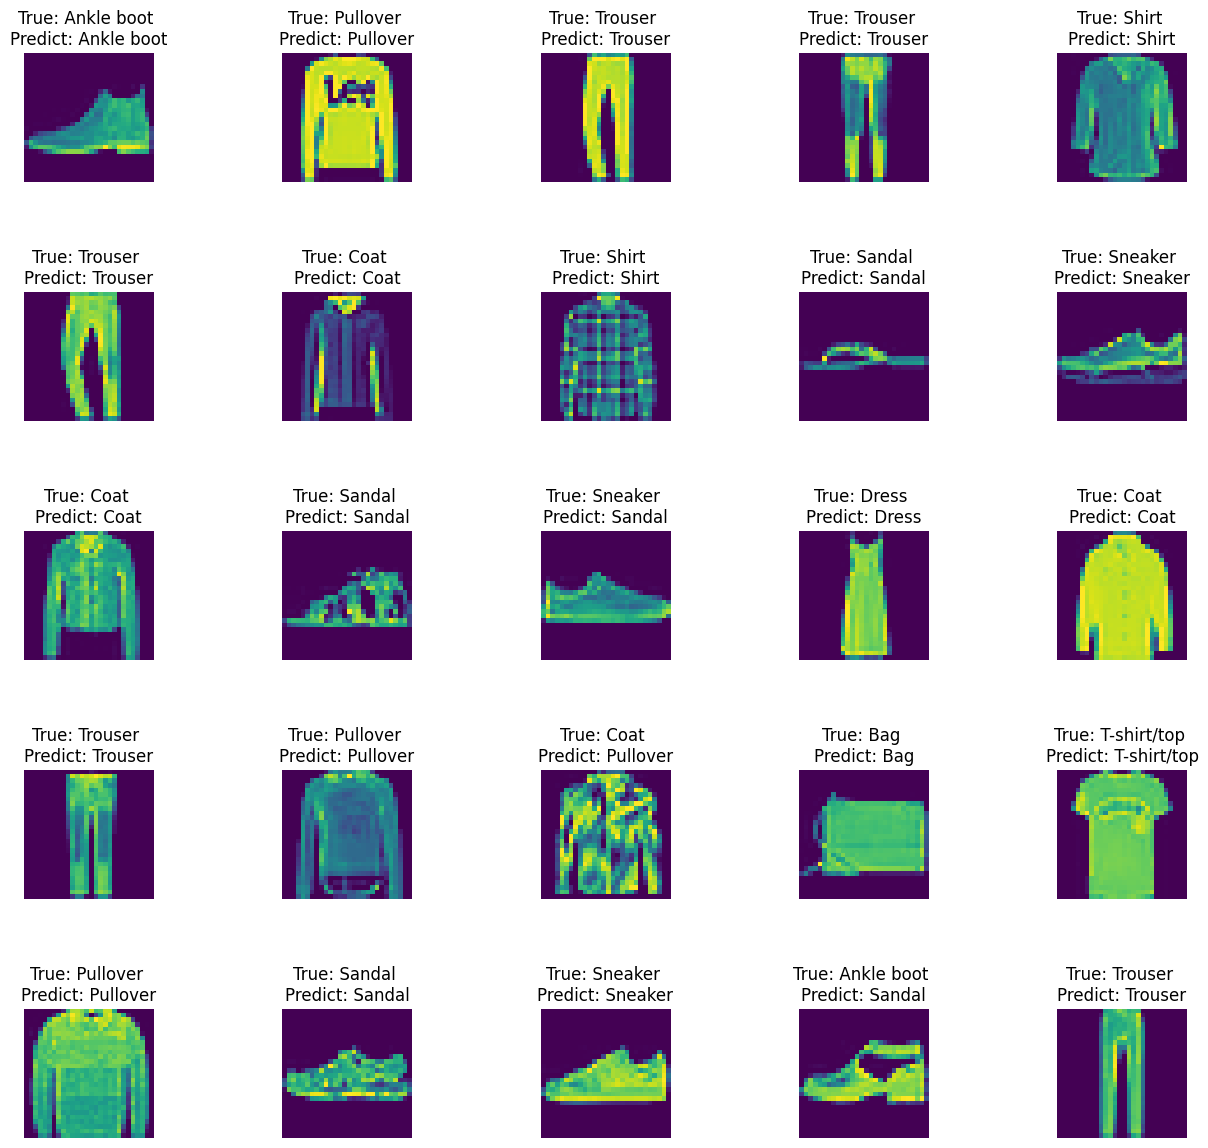

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
for i in np.arange(0, 25):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(Y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)


4


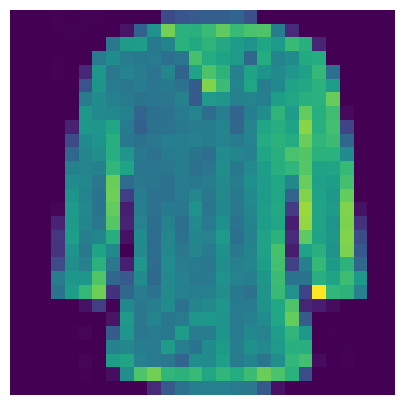

True label: Shirt
Predicted label: Shirt


In [ ]:
img_id= int(input())
true_label = class_names[np.argmax(Y_test[img_id])]
predicted_label = class_names[pred_classes[img_id]]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(X_test[img_id])
#ax.set_title("True: %s\nPredict: %s" % (true_label, predicted_label))
ax.axis('off')
plt.show()
print("True label:", true_label)
print("Predicted label:", predicted_label)